In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import pandas as pd
from pandas_datareader import data
from pandas_datareader._utils import RemoteDataError
from datetime import timedelta
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


***KAGGLE DATASET EXPORT TO GOOGLE COLAB upload the big dataset (>250MB) to read data ***


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"patrickleel","key":"af5770822d7d1c5a4039e3688b854ddc"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle


     |████████████████████████████████| 58 kB 2.9 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=e13c9f9f3dcc15c149e92bc066f379d710c9831e680018073a6ca38f8ad827e2
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-12-03 07:25:55          16876       1321  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01          10210        733  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4729        330  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [ ]:
!kaggle datasets download -d mczielinski/bitcoin-historical-data

 89% 89.0M/100M [00:00<00:00, 129MB/s]
100% 100M/100M [00:00<00:00, 129MB/s] 


In [ ]:
! unzip bitcoin-historical-data.zip

Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import sklearn.metrics as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
btc = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
btc.sample(3)


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3085311,1510824900,7443.84,7459.00,7431.02,7436.26,9.426397,70179.022248,7444.946247
4738475,1610014740,37260.43,37267.90,37200.00,37206.04,4.143282,154177.369600,37211.414823
3164198,1515558120,14138.99,14138.99,14138.99,14138.99,1.334415,18867.278503,14138.990000




***Convert timestamp***

In [ ]:
btc['Timestamp'] = pd.to_datetime(btc.Timestamp, unit='s')
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


**Find missing %**

In [ ]:
btc.isnull().sum().Open / btc.shape[0] * 100

25.602459928475803

***Remove NA value***

In [ ]:
btc.dropna(how='any', inplace=True)


In [ ]:
btc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
478,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
547,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
548,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
1224,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000
...,...,...,...,...,...,...,...,...
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202


**DatetimeIndex**

In [ ]:
btc.index = btc.Timestamp
btc.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2021-03-30 23:56:00,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
2021-03-30 23:59:00,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
2021-03-31 00:00:00,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


***See if one closed up or down each day. And create binary column 0 = loss, 1= gain to have something to predict.***

In [ ]:
btc['pos_neg'] = btc['Open']-btc['Close']

In [ ]:
btc['Up/Down'] = np.where(btc['pos_neg'] > 0, '0','1')

In [ ]:
btc.dtypes

Timestamp            datetime64[ns]
Open                        float64
High                        float64
Low                         float64
Close                       float64
Volume_(BTC)                float64
Volume_(Currency)           float64
Weighted_Price              float64
pos_neg                     float64
Up/Down                      object
dtype: object

In [ ]:
btc

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,pos_neg,Up/Down
Timestamp,,,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.00,1
2011-12-31 15:50:00,2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.00,1
2011-12-31 16:59:00,2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,-0.07,1
2011-12-31 17:00:00,2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.00,1
2012-01-01 04:16:00,2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.00,1
...,...,...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339,28.31,0
2021-03-30 23:57:00,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508,-1.84,1
2021-03-30 23:58:00,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496,-30.41,1


***Making sure the columns for feature are integer in order to make prediction.***

In [ ]:
btc[['Timestamp','Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price','pos_neg','Up/Down']] = btc[['Timestamp','Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price','pos_neg','Up/Down']].astype(int)

***Scaling feature***

In [ ]:
from sklearn.preprocessing import MinMaxScaler
cols = btc.columns.values
print (cols)

['Timestamp' 'Open' 'High' 'Low' 'Close' 'Volume_(BTC)'
 'Volume_(Currency)' 'Weighted_Price' 'pos_neg' 'Up/Down']


In [ ]:
Min_max_scaler = MinMaxScaler()
btc[cols] = Min_max_scaler.fit_transform(btc[cols])
btc.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,pos_neg,Up/Down
Timestamp,,,,,,,,,,
2011-12-31 07:52:00,0.000000,0.000016,0.000016,0.000049,0.000049,0.000000,1.438779e-07,0.000016,0.387962,1.0
2011-12-31 15:50:00,0.000098,0.000016,0.000016,0.000049,0.000049,0.008201,1.510718e-05,0.000016,0.387962,1.0
2011-12-31 16:59:00,0.000112,0.000016,0.000016,0.000049,0.000049,0.006322,1.230156e-05,0.000016,0.387962,1.0
2011-12-31 17:00:00,0.000113,0.000016,0.000016,0.000049,0.000049,0.001538,2.949498e-06,0.000016,0.387962,1.0
2012-01-01 04:16:00,0.000252,0.000016,0.000016,0.000049,0.000049,0.000171,4.316338e-07,0.000016,0.387962,1.0


***Spliting Data fit into linear regression***

In [ ]:
X = btc[['Open','High','Low','Close']]
y = btc['Up/Down']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=0)

***Linear regression***


In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
predictions1 = model_lr.predict(X_test)

In [ ]:
print('Accuracy of linear regression classifier on test set:\
      {:.2f}'.format(model_lr.score(X_test,y_test)))

Accuracy of linear regression classifier on test set:      0.13


***Linear SVM***

In [ ]:

from sklearn import model_selection


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                                    test_size = 0.25, random_state = 1234)

0.6307813553262352

In [ ]:
btc_day = btc.resample('D').mean()

In [ ]:
window_size = (date(2020, 9, 14) - date(2020, 5, 10)).days

btc_train = btc_day.loc['2019-12-31':'2020-05-10']
btc_test = btc_day.loc['2020-05-11':]

btc_train['Predicted_Price'] = btc_train[['Weighted_Price']].shift(-window_size)

X_train = btc_train[['Weighted_Price']].values[:-window_size].reshape(-1,1)
y_train = btc_train.Predicted_Price.values[:-window_size]

y_test = btc_test.Weighted_Price.values

y_test, y_test.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([0.1410281 , 0.14212185, 0.14652267, 0.15513224, 0.15426632,
        0.15231907, 0.15593771, 0.1574763 , 0.15664233, 0.15664901,
        0.15030565, 0.14779954, 0.14911427, 0.1477095 , 0.1428502 ,
        0.14350175, 0.14626826, 0.15098935, 0.1531394 , 0.15400011,
        0.15463788, 0.15526298, 0.16004868, 0.15472305, 0.15712951,
        0.15780345, 0.15610207, 0.15579722, 0.15753548, 0.15733009,
        0.15855728, 0.15614956, 0.15244594, 0.1526987 , 0.15231392,
        0.14974035, 0.15377775, 0.15295271, 0.15236282, 0.15107167,
        0.1506664 , 0.15142201, 0.15359329, 0.1561217 , 0.15285953,
        0.1495306 , 0.14870618, 0.14750006, 0.14669141, 0.14766144,
        0.14822379, 0.14888857, 0.14847109, 0.14730063, 0.14726691,
        0.14678523, 0.14928234, 0.15013921, 0.15139792, 0.15108931,
        0.14902868, 0.14964926, 0.14982164, 0.15029317, 0.14934666,
        0.14936847, 0.14789392, 0.14796537, 0.14840925, 0.14828836,
        0.14865962, 0.15078929, 0.15171161, 0.15

In [ ]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

In [ ]:
predictions = model_log.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on training set:\
      {:.2f}'.format(model_log.score(X_train,y_train)))

print('Accuracy of logistic regression classifier on test set:\
      {:.2f}'.format(model_log.score(X_test,y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test, predictions)
sns.heatmap(M, annot=True, fmt='d')
plt.show()

In [ ]:
# SVM Linaire
from sklearn import svm
import numpy as np

clf=svm.LinearSVC(C=0.01)
clf.fit(X_train,y_train)
from sklearn import metrics

# Classification sur le jeu de test
pred_linear_svc = clf.predict(X_test)
# Accuracy
metrics.accuracy_score(y_test, pred_linear_svc)

0.6307813553262352

In [ ]:
print('Accuracy of SVM linear classifier on training set:\
      {:.2f}'.format(clf.score(X_train,y_train)))

print('Accuracy of SVM linear classifier on test set:\
      {:.2f}'.format(clf.score(X_test,y_test)))

Accuracy of SVM linear classifier on training set:      0.63
Accuracy of SVM linear classifier on test set:      0.63


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_linear_svc)
print(confusion_matrix)

[[ 16678 316069]
 [ 17499 553197]]


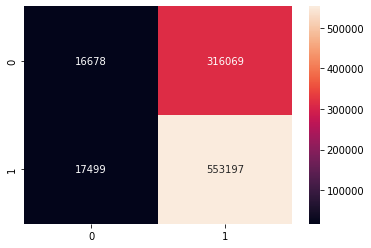

In [ ]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test,pred_linear_svc)
sns.heatmap(M, annot=True, fmt='d')
plt.show()

***Logistic regression***


In [ ]:
model_log = LogisticRegression()
model_log.fit(X_train,y_train)

In [ ]:
predictions = model_log.predict(X_test)

In [ ]:
print('Accuracy of logistic regression classifier on training set:\
      {:.2f}'.format(model_log.score(X_train,y_train)))

print('Accuracy of logistic regression classifier on test set:\
      {:.2f}'.format(model_log.score(X_test,y_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

In [ ]:
from sklearn.metrics import confusion_matrix
M = confusion_matrix(y_test, predictions)
sns.heatmap(M, annot=True, fmt='d')
plt.show()